In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.fft import fft, rfft, ifft, irfft
from scipy.fft import fftfreq, rfftfreq
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import plotly.express as px
import matplotlib.pyplot as plt

# Read the Excel file
file_path = '17_21.xlsx'
df = pd.read_excel(file_path, header=0)  # header=None if your Excel file has no header row
df_subset = df.iloc[:,1:]
# Concatenate all rows into a single list
data = df_subset.values.flatten().tolist()# Read the Excel file

In [77]:
file_path = '22_new.xlsx'
df = pd.read_excel(file_path, header=0)  # header=None if your Excel file has no header row
df_subset = df.iloc[:,1:]
# Concatenate all rows into a single list
data2 = df_subset.values.flatten().tolist()# Read the Excel file
data2 = [100*i for i in data2]

In [78]:
sampling_rate = 24 # It's used as a sample spacing, because 24 hours in a day
frequency_axis = fftfreq(8760, d=1.0/sampling_rate)
norm_amplitude = 2/8760*np.abs(fft(data))
sampling_rate = 24 # It's used as a sample spacing, because 24 hours in a day
rfft_data = rfft(data)
rfft_freq = rfftfreq(8760, d=1.0/sampling_rate)
norm_rfft_amp = 2/8760*np.abs(rfft(data))
amparray =2/8760*(np.abs(rfft(data)))
phasearray = np.angle(rfft(data) , deg = True)
phasearray = 360 - phasearray
phasearray[phasearray > 360] -= 360
freqarray = 15*rfftfreq(8760, d=1/24)
const_rfft_data = np.zeros(np.shape(rfft_data), dtype='complex128') #constructed rfft data array
top_amp = []
top_speed = []
top_phase = []
tmp = np.argpartition(-amparray, 11)
top_indices = tmp[:11]
for i in top_indices:
    top_amp.append(amparray[i])
    top_speed.append(15*rfft_freq[i])
    top_phase.append(phasearray[i])
    const_rfft_data[i] = rfft_data[i]
pred_tide = irfft(const_rfft_data, 8760)

In [79]:
data = irfft(const_rfft_data)
dft_data = fft(data)
const_tide_data = np.zeros(np.shape(dft_data)[0]+8760, dtype='complex128')
N = len(dft_data)
M = N+8760 #One year prediction
for k in range(0, M):
    for n in range(0, N):
        const_tide_data[k] += dft_data[n]*(np.exp(1j * 2*np.pi * n * k / N))*(1/N)


In [71]:
data_concat = np.concatenate((data,data2))

In [72]:
len(const_tide_data)

43824

In [73]:
pred_2018 = const_tide_data[8760:]
actual_2018 = data_concat[8760:]
# Calculate the differences between the predicted and actual values
differences = pred_2018 - actual_2018

# Calculate the standard deviation of the differences
std_deviation = np.std(differences)

print(f"The standard deviation between the predicted and actual values is: {std_deviation}")


The standard deviation between the predicted and actual values is: 15.889780516524151


In [23]:
stddev = []

In [74]:
stddev.append(std_deviation)

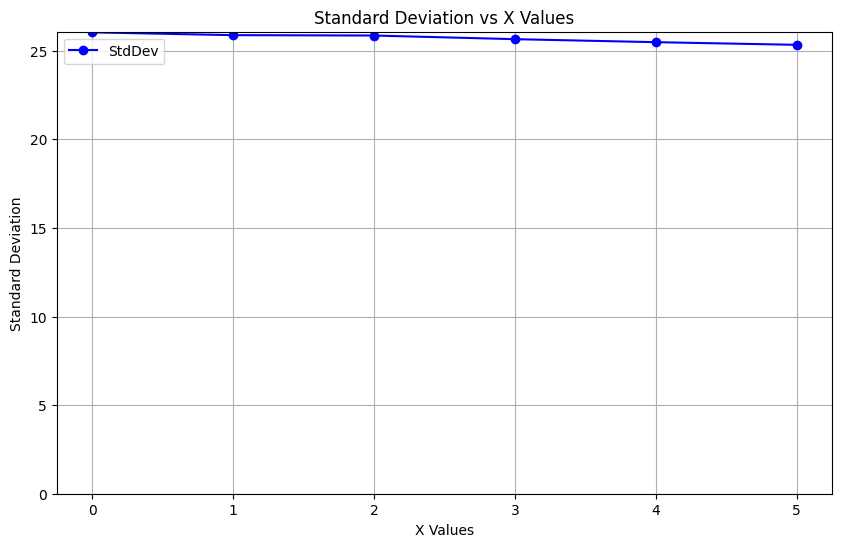

In [13]:

plt.figure(figsize=(10, 6))
plt.plot(stddev, marker='o', linestyle='-', color='b', label='StdDev')

# Add title and labels
plt.title('Standard Deviation vs X Values')
plt.xlabel('X Values')
plt.ylabel('Standard Deviation')
plt.ylim(0)
# Show legend
plt.legend()

# Show grid
plt.grid(True)

# Show the plot
plt.show()